# <center> Data cleaning of a dataset about apartments in Moscow</center> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <center>I data acquaintance</center>

Learn more about data [here](./README.md).

In [3]:
sber_data = pd.read_csv('data/sber_data.csv')
print('Shape of data: {}'.format(sber_data.shape))
sber_data.head()

Shape of data: (30471, 61)


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
#display(sber_data.info());

### <center> II Detection of missing data </center>

In [4]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**1. List of columns with missing data**

The first way is to display the names of columns where the number of gaps is <strong>greater than 0</strong>. 

In [4]:
cols_null_persent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Large number of missing data (more than 47%) are in the hospital_beds_raion column (the number of hospital beds in the county). 

Next we have columns with just over 20%: 

* preschool_quota (the capaciity of kindergarten in the district);
* school_quota (capaciity of schools in the district);
* life_sq (the living area of the building in square meters). 

Less than one percent of the gaps contain the attributes:

* floor (number of floors in the building);
* metro_min_walk (walktime to the nearest subway);
* metro_km_walk (distance to the nearest metro in kilometers);
* railroad_station_walk_km (distance to the nearest railway station in kilometers);
* railroad_station_walk_min (walktime to the nearest railway station). 

**2. Column Chart of missing data**

The bar chart to visually estimate the ratio of the number of gaps to the number of entries.

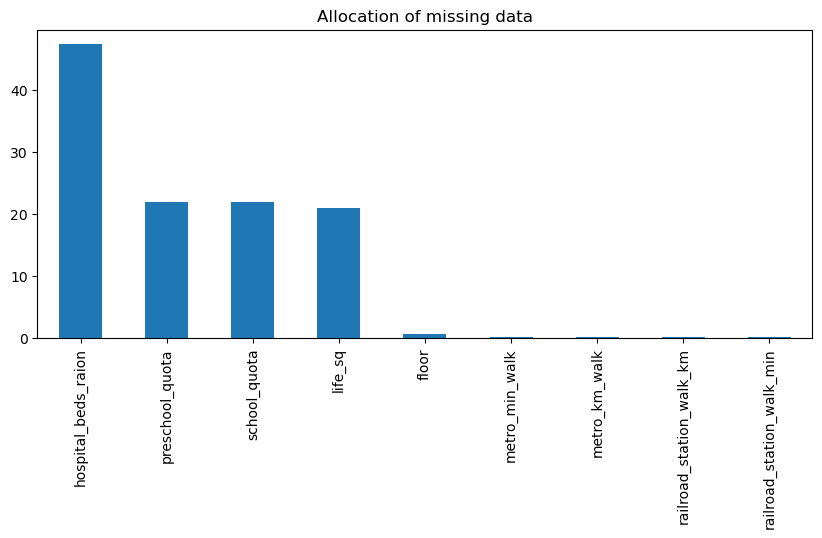

In [7]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Allocation of missing data'
);

**3. Heat map of missing data**

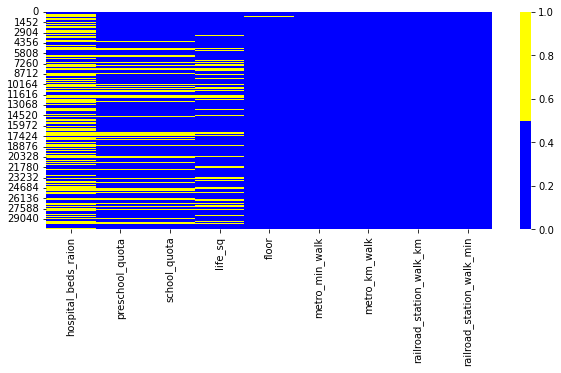

In [7]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

On the resulting heat map we don't see clear percentages for the number of missing data, but we can see where they are concentrated in the table. For example, we can see that preschool_quota and school_quota are very strongly related to each other in terms of gaps: in all the entries where at least one is not defined, the other is not defined either (the yellow lines for these two features completely coincide with each other).

### <center>III Missing data processing</center>

Distribution of features before processing

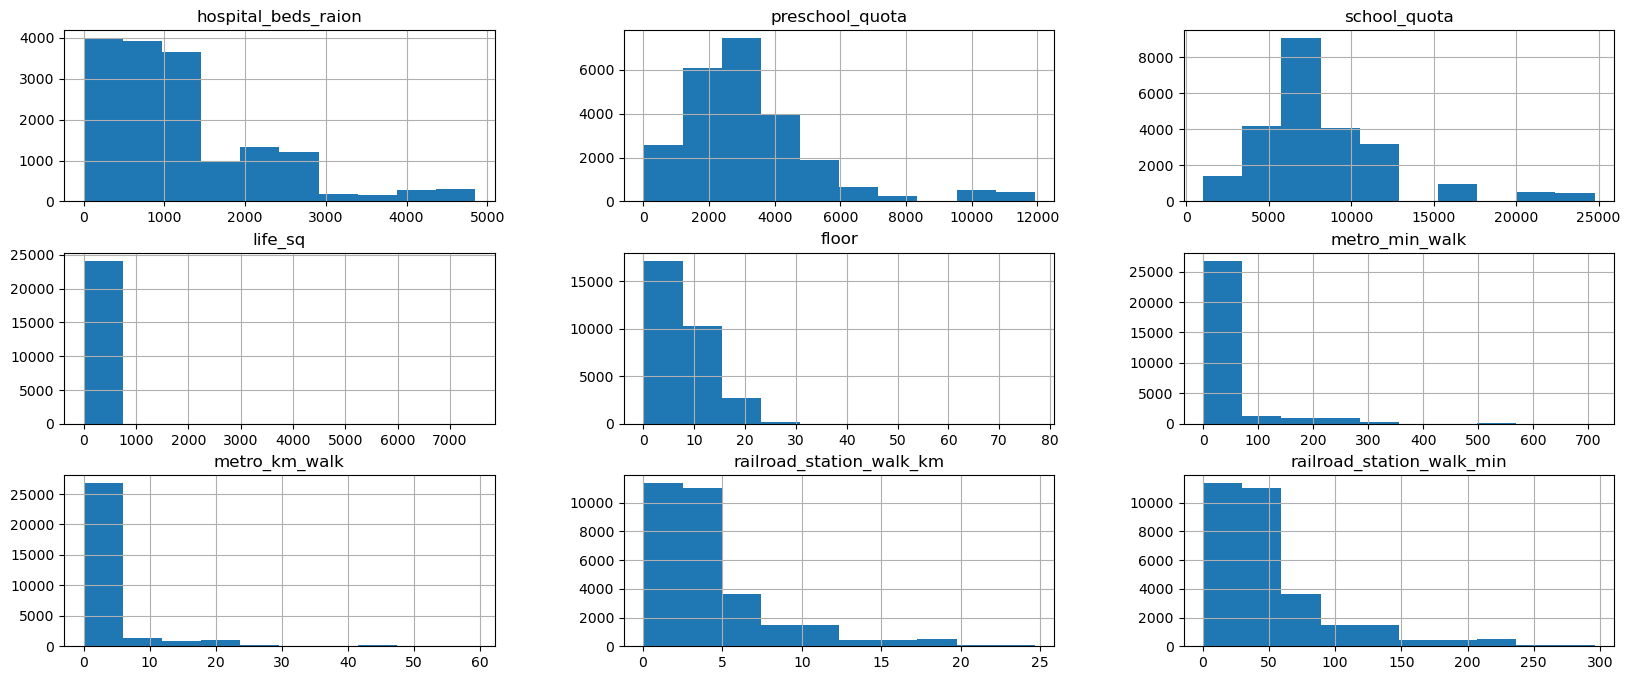

In [10]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

**For processing of missing data use combine metod**
* delete columns with more than 30% of missing data;
* delete the records with more than two gaps at the same line;
* fill the remaining cells with constants.

In [15]:
#copiying of original data
combine_data = sber_data.copy()

#delele columns with mpre then 30% of missing data
n = combine_data.shape[0] 
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#discard lines with more than 2 gaps in a line
m = combine_data.shape[1]
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#create a dict with valies for filling 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}

combine_data = combine_data.fillna(values)
#output the resultant fraction of missing data
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [16]:
print(combine_data.shape)

(26800, 60)


### <center>IV Outliers detection</center>

In [14]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Show buildings with more than 1,000 square meters of living space:

In [15]:
display(sber_data[sber_data['life_sq'] > 1000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


It is defenetli outlier: ***huge life_sq, and 100 more then full_sq***

Now let's look at the flats which have life_sq biger then fuul_sq

In [16]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


So we detect 37 more outliers

In [17]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Result number of records: {cleaned.shape[0]}')

Result number of records: 30434


Let's look at future (floor).

In [22]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Checking of flats with floor > 50

In [18]:
sber_data[sber_data['floor']> 50]

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


The sub_area don't have buildings that hight.

It's mean that record # 23584 also outlier.

#### *Interquartile range method*

This method belongs to the statistical category and is implemented as a separate python function in the find_outliers directory in the file find_outliers.py

More details about the method can be found in the file [README.md](./outliers_lib/README.md)

In [22]:
from outliers_lib.find_outliers import find_outliers_iqr

On the histogram, we can see the potential outliers as low, faraway "stubs" from the main group of columns, and on the box plot as points outside the whiskers.

Let's construct a histogram and a box plot for the full_sq feature:

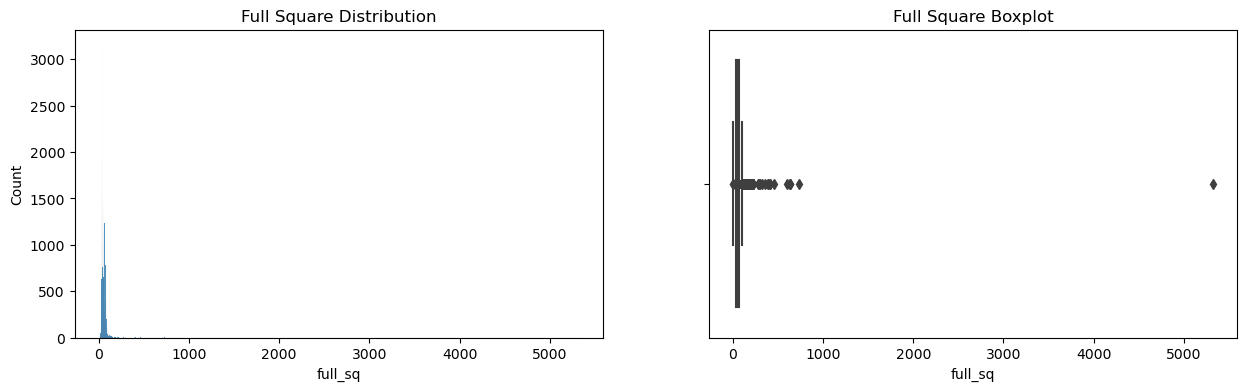

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

The bulk of the apartments have a total area of less than 250 square meters, and only a few observations are out of this interval. The maximum area, judging by the histogram, exceeds 5,000 square meters.

The data are not normally distributed, the distribution is not even symmetrical. That's try to logarithm the sign:

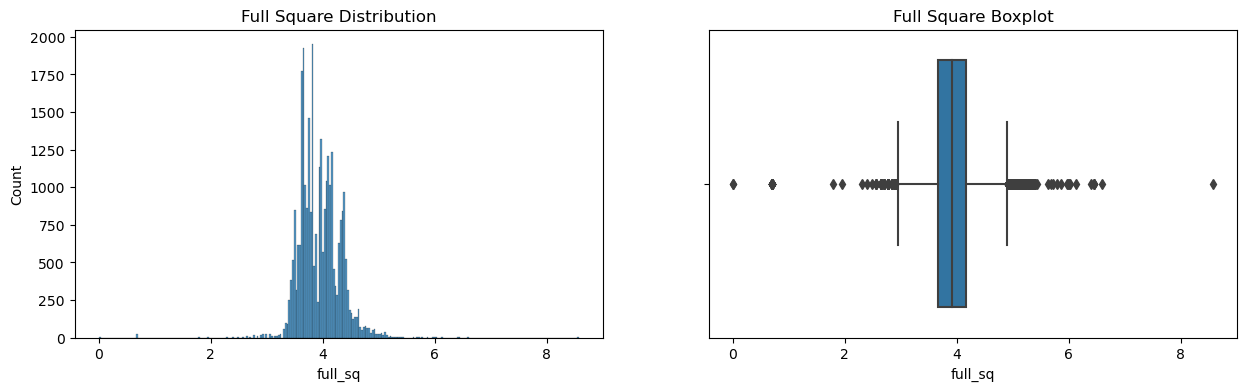

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x=np.log(sber_data['full_sq']+1), ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x=np.log(sber_data['full_sq']+1), ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

Using logarithm, achieve similarity of symmetry in the data.

Will use the method of interquartile range with preliminary logarithm and 2 ranges to the left and right side of the distribution. 

In [23]:
outliers, cleaned = find_outliers_iqr(sber_data, 'full_sq', left=2, right=2, log_scale=True)
print(f'Outliers of metod of John Tukey: {outliers.shape[0]}')
print(f'Result quantity of records: {cleaned.shape[0]}')

Outliers of metod of John Tukey: 111
Result quantity of records: 30360


Distribution after removal of outilers

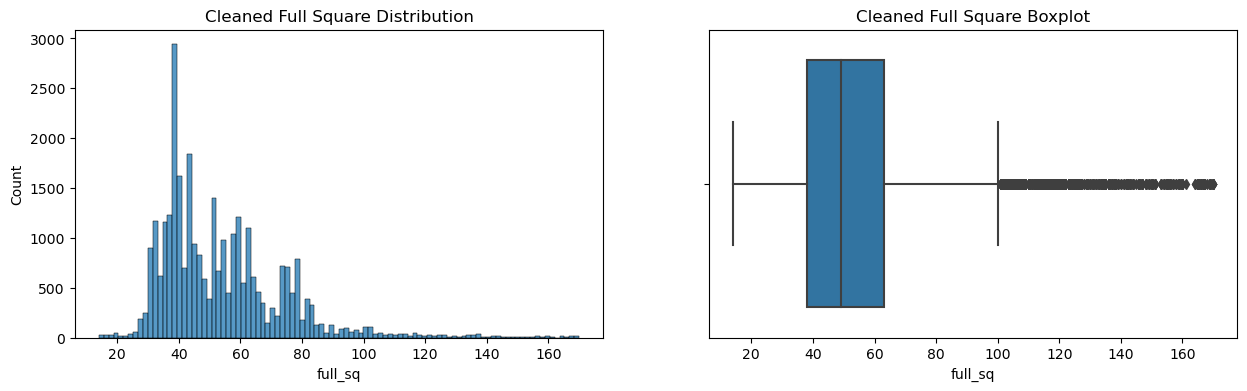

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

#### *z score method*

This method also belongs to the statistics category and is applied as separate python functions in the find_outliers directory in the file find_outliers.py [README.md](./outliers_lib/find_outliers.py)

In [25]:
from outliers_lib.find_outliers import find_outliers_z_score

Histograms of the future of distance to the Moscow Ring Road (mkad_km): the first - in normal scale, and the second - in logarithmic scale.

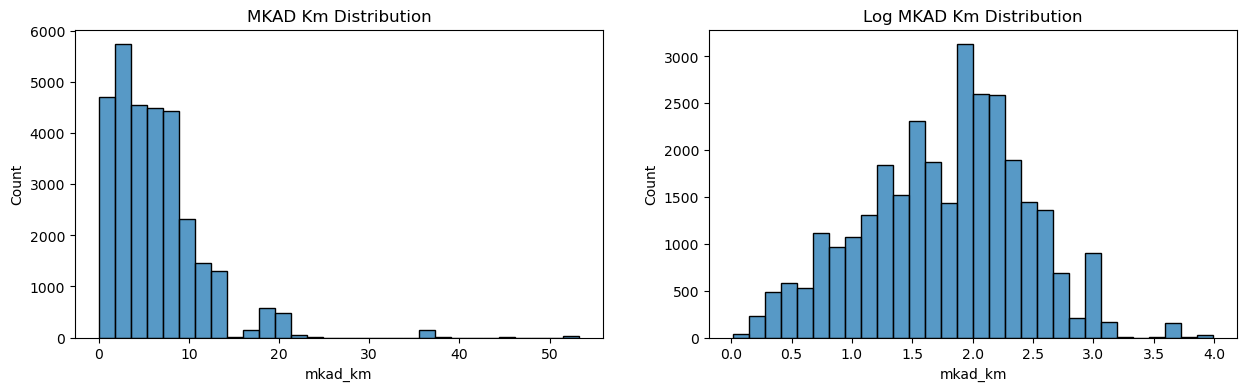

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

The left distribution resembles the lognormal distribution with potential "stubs" far away from the bulk of the observations.

By taking the natural logarithm of the left distribution, we obtain the right distribution, which resembles a slightly skewed 
normal distribution.

Further will use logarithmic **z score method** 

In [27]:
outliers, cleaned = find_outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Quantity of outliers on z score method: {outliers.shape[0]}')
print(f'Result quantity of records: {cleaned.shape[0]}')

Quantity of outliers on z score method: 33
Result quantity of records: 30438


Histogram of clean data:

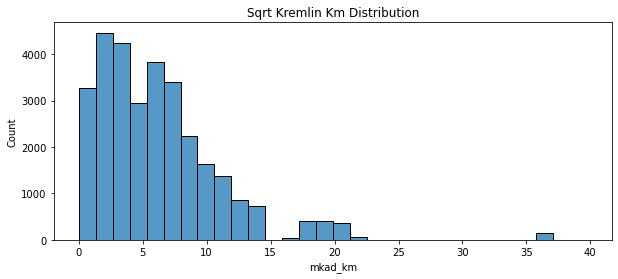

In [32]:
fig = plt.figure(figsize=(10, 4))
histplot = sns.histplot(cleaned['mkad_km'], bins=30)
histplot.set_title('Sqrt Kremlin Km Distribution');

So, the z-score method has found us 33 potential outliers on the basis of distance to the Moscow Ring Road. Let's find out in which neighborhoods (sub_area) these apartments are represented:

In [28]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Our potential outliers are apartments from Rogovskoye and Kievskiy settlements. These settlements are the most remote areas of the Moscow region.
These observations have the right to exist, they are part of the Moscow region.

The lagarithmic plot is not perfectly normal and there is some asymmetry in it. 

Histogram of the logarithmic distribution, with lines corresponding to the mean (center of the interval in the three-sigma method) and the interval boundaries:

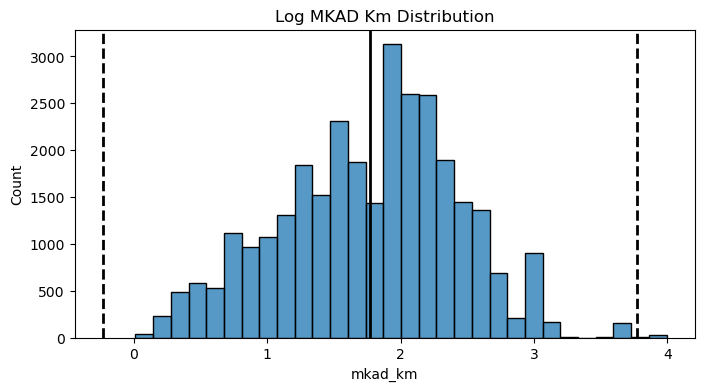

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean() + 3 *log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean() - 3 *log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

The asymmetry of the distribution is left-handed. This can be seen by calculating the asymmetry coefficient:

In [35]:
print(log_mkad_km.skew())

-0.14263612203024953


The graph shows that because of the left asymmetry, three sigmas are not enough to cover the entire interval. Let's increase the values of the bounds:

In [30]:
outliers, cleaned = find_outliers_z_score(sber_data, 'mkad_km', log_scale=True, right=3.5)
print(f'Quantity of outliers on z score method: {outliers.shape[0]}')
print(f'Result quantity of records: {cleaned.shape[0]}')

Quantity of outliers on z score method: 0
Result quantity of records: 30471


### <center>V Search and eliminate duplicates</center>

Find the number of complete duplicates of the table sber_data at all columns, not including id. 

In [31]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Quantity of duplicates: {sber_duplicates.shape[0]}')

Quantity of duplicates: 562


In [32]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Result quantity of records: {sber_dedupped.shape[0]}')

Result quantity of records: 29909


### As a result of the work, we received a dataset with records cleared from duplicates, missing data and outliers